# Variational inference using the finite approximation

In [8]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from copy import deepcopy

import VI_algorithms_lib
import valez_finite_VI_lib


# Draw data

In [9]:
# np.random.seed(34134) # cavi works great for this seed
# np.random.seed(5365)
# np.random.seed(234213)

Num_samples = 500 # sample size
D = 2 # dimension
# so X will be a N\times D matrix

K_inf = 3 # take to be large for a good approximation to the IBP

alpha = 10 # IBP parameter

# Parameters to draw A from MVN
sigma_eps = .1 # variance of noise
sigma_A = 100

# generate data
Pi, Z, mu, A, X = valez_finite_VI_lib.generate_data(Num_samples, D, K_inf, sigma_A, sigma_eps, alpha)

K_approx = deepcopy(K_inf) # variational truncation
print(Pi)

[ 0.49700491  0.92252452  0.53989644]


In [10]:
VI_instance = VI_algorithms_lib.VI_algorithms(X, K_approx, alpha, sigma_eps, sigma_A)

# Run CAVI with random restarts

In [11]:
n_restart = 20
elbo_end = np.array([])

for i in range(n_restart): 
    VI_instance.re_init() # re initialize
    [tau_tmp, nu_tmp, phi_mu_tmp, phi_var_tmp, elbo] \
        = VI_instance.run_cavi(max_iter=200, tol=1e-6, verbose = False) # run cavi
        
    elbo_end = np.append(elbo_end, elbo[-1])
    
    # see if posterior predictive is better than all previous ones
    if (i == 0) or np.all(elbo_end[i] > elbo_end[:i]): 
        tau = deepcopy(tau_tmp)
        nu = deepcopy(nu_tmp)
        phi_mu = deepcopy(phi_mu_tmp)
        phi_var = deepcopy(phi_var_tmp)
    
    
print('max elbo: ', np.max(elbo_end))
print('average elbo', np.mean(elbo_end))
#print(elbo_end)
#print(np.argmax(elbo_end))

elbo converged:  847571.008485
elbo converged:  846005.697917
elbo converged:  845968.174991
elbo converged:  862287.699722
elbo converged:  862287.699722
elbo converged:  782051.764089
elbo converged:  765548.715215
elbo converged:  862287.699722
elbo converged:  845968.174991
elbo converged:  862287.699722
elbo converged:  765548.715215
elbo converged:  765548.715215
elbo converged:  845877.642659
elbo converged:  850925.783376
elbo converged:  860341.738007
elbo converged:  860341.738007
elbo converged:  860341.738007
elbo converged:  765548.715215
elbo converged:  847329.533098
elbo converged:  852971.894861
max elbo:  862287.699722
average elbo 832852.027412


Z (unpermuted): 
 [[0 1 0]
 [0 1 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 1]]
permutation:  [0 1 2]
Z (permuted) 
 [[0 1 0]
 [0 1 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 1]]
round_nu 
 [[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 1.  1.  0.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 0.  1.  1.]]
l1 error (after permutation):  [0.02, 0.02, 5.1711936747801899e-34]


true A (permuted): 
 [[  6.5372301    9.71862856]
 [  6.04979721  10.5018011 ]
 [  4.6394918   -1.82895206]]
phi_mu: 
 [[  6.5034972    9.7470092 ]
 [  6.04761843  10.45490532]
 [  4.65013165  -1.83506933]]


true Pi (permuted):  [ 0.49700491  0.92252452  0.53989644]
computed Pi:  [ 0.43093192  0.94646398  0.52214144]


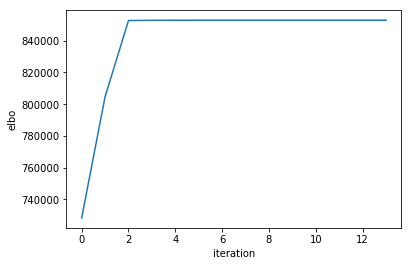

final elbo:  852971.894861


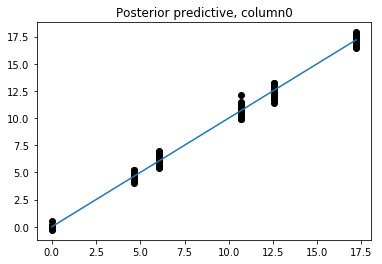

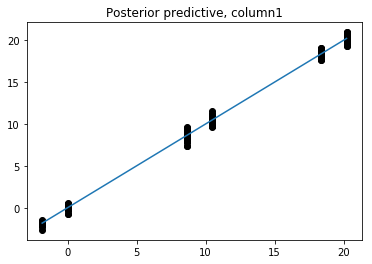

In [12]:
valez_finite_VI_lib.display_results(elbo, tau, nu, phi_mu, phi_var, X, Pi, Z, mu, A, alpha, sigma_eps, sigma_A)

# Run Stochastic VB 

In [13]:
VI_instance.re_init() # initialize

In [14]:
n_restart = 20
elbo_end = np.array([])

batch_size = 10

for i in range(n_restart): 
    VI_instance.re_init() # re initialize
    
    [tau, nu, phi_mu, phi_var, elbo] = \
        VI_instance.run_stochastic_VI(batch_size, decay_param = 0.9, max_iter=1000, tol=1e-6, verbose = False) 
        
    elbo_end = np.append(elbo_end, elbo[-1])
    
    # see if posterior predictive is better than all previous ones
    if (i == 0) or np.all(elbo_end[i] > elbo_end[:i]): 
        tau = deepcopy(tau_tmp)
        nu = deepcopy(nu_tmp)
        phi_mu = deepcopy(phi_mu_tmp)
        phi_var = deepcopy(phi_var_tmp)
    
    
print('max elbo: ', np.max(elbo_end))
print('average elbo', np.mean(elbo_end))




Max iteration reached; elbo:  845142.633393
Max iteration reached; elbo:  765530.989017
Max iteration reached; elbo:  765530.510125
Max iteration reached; elbo:  845173.305611
elbo converged -205256.862063
Max iteration reached; elbo:  765547.217841
Max iteration reached; elbo:  861834.932843
Max iteration reached; elbo:  765530.842642
Max iteration reached; elbo:  765545.124571
elbo converged -199299.280144
Max iteration reached; elbo:  845546.805442
Max iteration reached; elbo:  845598.642983
Max iteration reached; elbo:  859237.522468
elbo converged 765548.121821
Max iteration reached; elbo:  765513.912924
Max iteration reached; elbo:  765545.998321
Max iteration reached; elbo:  861126.736868
Max iteration reached; elbo:  765535.754533
Max iteration reached; elbo:  841527.45495
Max iteration reached; elbo:  844458.904322
max elbo:  861834.932843
average elbo 706745.963424


Z (unpermuted): 
 [[0 1 0]
 [0 1 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 1]]
** procedure did not give a true permutation
permutation:  [0 1 2]
Z (permuted) 
 [[0 1 0]
 [0 1 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 1]]
round_nu 
 [[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 0.  1.  0.]]
l1 error (after permutation):  [0.085999999999999993, 0.085999999999999993, 0.52000000000000002]


true A (permuted): 
 [[  6.5372301    9.71862856]
 [  6.04979721  10.5018011 ]
 [  4.6394918   -1.82895206]]
phi_mu: 
 [[  6.50256652e+00   8.79141037e+00]
 [  8.60056107e+00   1.01988108e+01]
 [ -1.22219275e-07   2.11083048e-08]]


true Pi (permuted):  [ 0.49700491  0.92252452  0.53989644]
computed Pi:  [ 0.49483863  0.870628    0.00660939]


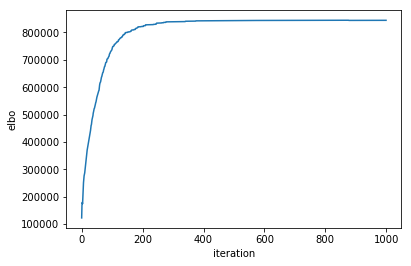

final elbo:  844458.904322


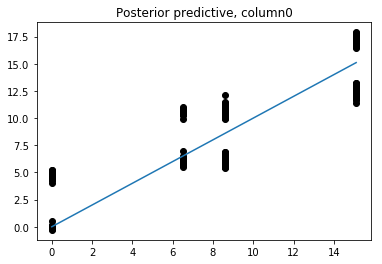

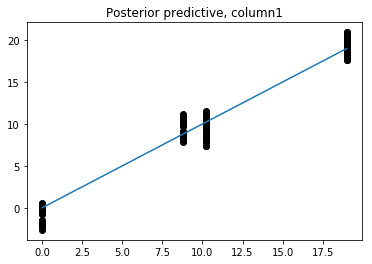

In [15]:
valez_finite_VI_lib.display_results(elbo, tau, nu, phi_mu, phi_var, X, Pi, Z, mu, A, alpha, sigma_eps, sigma_A)

# Gultekin: Annealing method

elbo converged:  847426.12866
elbo converged:  847890.559672
elbo converged:  862287.699718
elbo converged:  860341.738003
elbo converged:  860341.738003
elbo converged:  862281.065014
elbo converged:  860341.738003
elbo converged:  862287.699718
elbo converged:  846108.43172
elbo converged:  862281.065014
elbo converged:  862226.55656
elbo converged:  862281.065014
elbo converged:  862287.699718
elbo converged:  862281.065014
elbo converged:  862287.699718
elbo converged:  847571.008484
max elbo:  862287.699718
average elbo 855717.762237
Z (unpermuted): 
 [[0 1 0]
 [0 1 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 1]]
permutation:  [1 0 2]
Z (permuted) 
 [[1 0 0]
 [1 0 0]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 0 1]]
round_nu 
 [[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  1.  0.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  0.  1.]]
l1 error (after permutation):  [0.02, 0.02, 6.0839659396

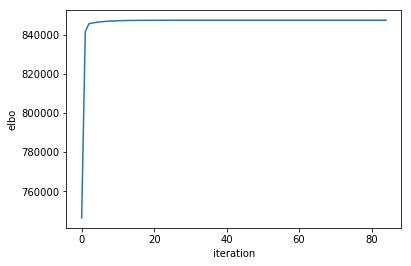

final elbo:  847571.008484


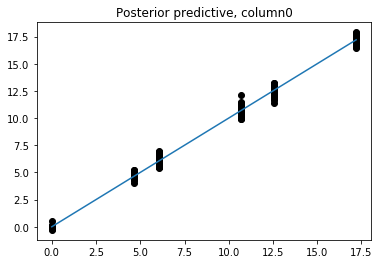

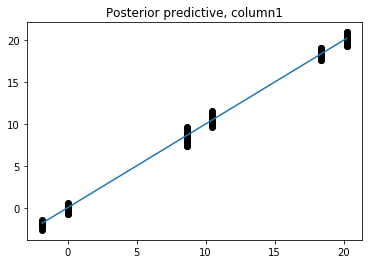

In [16]:
n_restart = 20
elbo_end = np.array([])

for i in range(n_restart): 
    VI_instance.re_init() # re initialize
    [tau_tmp, nu_tmp, phi_mu_tmp, phi_var_tmp, elbo] \
        = VI_instance.run_cavi_anneal(max_iter=200, tol=1e-6, verbose = False) # run cavi + annealing
        
    elbo_end = np.append(elbo_end, elbo[-1])
    
    # see if posterior predictive is better than all previous ones
    if (i == 0) or np.all(elbo_end[i] > elbo_end[:i]): 
        tau = deepcopy(tau_tmp)
        nu = deepcopy(nu_tmp)
        phi_mu = deepcopy(phi_mu_tmp)
        phi_var = deepcopy(phi_var_tmp)
    
    
print('max elbo: ', np.max(elbo_end))
print('average elbo', np.mean(elbo_end))

valez_finite_VI_lib.display_results(elbo, tau, nu, phi_mu, phi_var, X, Pi, Z, mu, A, alpha, sigma_eps, sigma_A)